# 1. Modelo de precios hedónicos (OLS)

## 1.1. Obtención y limpieza de datos

Vamos a cargar las librerías necesarias e importar el archivo que usamos para el *ejercicio 1*.

In [1]:
import pandas as pd #permite manipular los dataframes, que serían el equivalente a los Excel
import numpy as np #en caso se necesiten cálculos numéricos, como p. ej. encontrar valores nulos 
import statsmodels.api as sm #para elaborar modelos OLS

base=pd.read_csv('rawdata/clases/habitaclia4043_ejercicio1.csv')
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                4043 non-null   int64  
 1   DP2e                                      4043 non-null   float64
 2   Dist_CBD2                                 4043 non-null   float64
 3   EPC_A_emision                             4043 non-null   float64
 4   EPC_B_emision                             4043 non-null   float64
 5   EPC_C_emision                             4043 non-null   float64
 6   EPC_D_emision                             4043 non-null   float64
 7   EPC_E_emision                             4043 non-null   float64
 8   EPC_F_emision                             4043 non-null   float64
 9   EPC_G_emision                             4043 non-null   float64
 10  Estado_contemporaneidad_calidad     

In [5]:
base.describe()

,Unnamed: 0,DP2e,Dist_CBD2,EPC_A_emision,EPC_B_emision,EPC_C_emision,EPC_D_emision,EPC_E_emision,EPC_F_emision,EPC_G_emision,...,bool_aire_acondicionado,bool_ascensor,bool_calefaccion,bool_piscina_comunitaria,desplaz_ponderado,dum_mar_200m,grand_terr_20m2,opin_ruido_si_pr,ratio_bano_hab,superficie
count,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,...,4043.00000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4034.000000,4043.000000
mean,2021.000000,13.209126,4.343123,0.017809,0.013604,0.021766,0.051942,0.343062,0.047984,0.063319,...,0.50136,0.700470,0.545387,0.035370,26.473732,0.008410,0.076428,43.963124,0.532729,94.123671
std,1167.257898,2.388901,2.643334,0.132271,0.115853,0.145937,0.221937,0.474791,0.213759,0.243567,...,0.50006,0.458109,0.497997,0.184735,2.752761,0.091329,0.265715,6.907413,0.263269,47.977146
min,0.000000,5.047646,0.067320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,10.158544,0.000000,0.000000,19.501782,0.000000,18.000000
25%,1010.500000,11.534675,2.401680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,24.250529,0.000000,0.000000,39.131721,0.333333,65.000000
50%,2021.000000,12.899869,3.657355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.00000,1.000000,1.000000,0.000000,26.401750,0.000000,0.000000,43.690805,0.500000,81.000000
75%,3031.500000,14.513569,5.893800,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.00000,1.000000,1.000000,0.000000,28.303374,0.000000,0.000000,48.798104,0.666667,107.000000
max,4042.000000,20.540556,12.125419,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,33.543398,1.000000,1.000000,64.808852,4.000000,495.000000


Noten que hay una columna que no nos aporta nada: `Unnamed: 0`. Eliminémosla.

In [29]:
base=base.drop('Unnamed: 0',axis=1) #axis 1 son las columnas

In [3]:
# Encontrar las filas que contienen valores NaN o valores nulos
filas_con_nan_o_null = base[base.isnull().any(axis=1)]

print("Las filas que contienen valores NaN o valores nulos son:")
print(filas_con_nan_o_null)

Las filas que contienen valores NaN o valores nulos son:
      Unnamed: 0       DP2e  Dist_CBD2  EPC_A_emision  EPC_B_emision  \
172          172  10.870856   8.884868            0.0            0.0   
193          193  11.917147   7.841576            0.0            0.0   
203          203  12.813348   8.663188            0.0            0.0   
204          204  12.162851   9.256362            0.0            0.0   
230          230  14.047311   1.473110            0.0            0.0   
...          ...        ...        ...            ...            ...   
3842        3842  11.460553   3.917402            0.0            0.0   
3919        3919   8.824781   7.285692            1.0            0.0   
3960        3960  11.112743   7.813589            0.0            0.0   
3967        3967  10.773233   8.309614            0.0            0.0   
4008        4008  11.971144   8.502621            0.0            0.0   

      EPC_C_emision  EPC_D_emision  EPC_E_emision  EPC_F_emision  \
172       

Hay 191 filas con valores *NaN* o *null*. De hecho, si revisan el resultado de la celda con `base.info()`, se darán cuenta que nos indica en qué columna están esos valores.

In [30]:
#Para no sobreescribir, creo una nueva variable: 'df'
df = base.replace([np.inf, -np.inf], np.nan).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3852 entries, 0 to 4042
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   DP2e                                      3852 non-null   float64
 1   Dist_CBD2                                 3852 non-null   float64
 2   EPC_A_emision                             3852 non-null   float64
 3   EPC_B_emision                             3852 non-null   float64
 4   EPC_C_emision                             3852 non-null   float64
 5   EPC_D_emision                             3852 non-null   float64
 6   EPC_E_emision                             3852 non-null   float64
 7   EPC_F_emision                             3852 non-null   float64
 8   EPC_G_emision                             3852 non-null   float64
 9   Estado_contemporaneidad_calidad           3852 non-null   float64
 10  Ausencia_singulares_presencia_arm_cocina 

Lo que buscamos en este caso es encontrar el mejor modelo para **predecir `Ln_total_pr`**. Será necesario subdividir las observaciones en dos muestras: una de entrenamiento (75-80%) y otra de testeo (20-25%), de lo contrario se basarían en los mismos datos que se utilizaron para entrenar el modelo (100%) y no proporcionarían una estimación imparcial de su rendimiento en datos no vistos.

## 1.2. Muestras de entrenamiento y testeo

Primero, cargamos las nuevas librerías que usaremos para esta tarea y la futura elaboración del modelo.

In [39]:
from sklearn.model_selection import train_test_split #para dividir datos en entrenamiento y testeo
import seaborn as sns #para hacer gráficos, p. ej. el de distribución de una variable
import matplotlib.pyplot as plt #complemento de sns para gráficos 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #para calcular parámetros del modelo
from scipy import stats

Ahora dividimos las muestras.

In [31]:
X_ols = df.drop('Ln_total_pr', axis=1)  # Todas las columnas excepto 'Ln_total_pr'
y_ols = df['Ln_total_pr']  # Columna 'Ln_total_pr'

In [32]:
# Dividir los datos en conjuntos de entrenamiento y testeo
X_trainOLS, X_testOLS, y_trainOLS, y_testOLS = train_test_split(
                                                    X_ols, y_ols, 
                                                    test_size=0.25, 
                                                    random_state=42 #Puede ser cualquier número
                                                    ) 

## 1.3. Distribución de la variable

Veamos si nuestra variable independiente tiene una distribución normal.

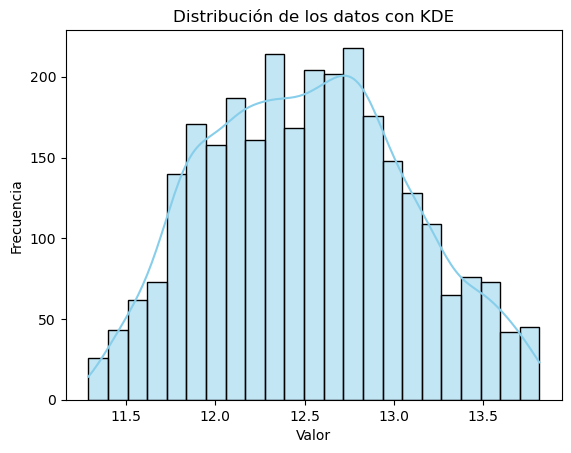

In [11]:
# Crear un histograma de los datos con KDE
sns.histplot(y_trainOLS, ## aquí almacené mi Y entrenamiento ## 
             kde=True, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de los datos con KDE')

# Mostrar el histograma
plt.show()

La gráfica parece indicar que sí tenemos algo cercano a la normalidad. Veamos si las pruebas de Kolmogorov y Shapiro nos lo confirman.

In [40]:
# Crear una lista vacía para almacenar los resultados
resultados_list = []


# Iterar sobre las columnas del DataFrame
for columna in df.columns: ## 'df' es el nombre de mi dataframe ##
    # Realizar la prueba de Shapiro-Wilk
    shapiro_test_statistic, shapiro_p_value = stats.shapiro(df[columna]) ## revisa 'df' ##
    
    # Realizar la prueba de Kolmogorov-Smirnov
    kolmogorov_test_statistic, kolmogorov_p_value = stats.kstest(df[columna], ## revisa 'df' ##
                                                                 'norm') 
    
    # Determinar si los datos son normales
    es_normal = 1 if shapiro_p_value > 0.05 or kolmogorov_p_value > 0.05 else 0
    
    # Agregar los resultados a la lista
    resultados_list.append({
        'Variable': columna,
        'Shapiro-Wilk p-value': shapiro_p_value,
        'Kolmogorov-Smirnov p-value': kolmogorov_p_value,
        'Es normal': es_normal
    })
    

# Convertir la lista de resultados en un DataFrame
normalidad = pd.DataFrame(resultados_list)

print(normalidad)

                                    Variable  Shapiro-Wilk p-value  \
0                                       DP2e          5.553070e-28   
1                                  Dist_CBD2          2.291895e-38   
2                              EPC_A_emision          0.000000e+00   
3                              EPC_B_emision          0.000000e+00   
4                              EPC_C_emision          0.000000e+00   
5                              EPC_D_emision          0.000000e+00   
6                              EPC_E_emision          0.000000e+00   
7                              EPC_F_emision          0.000000e+00   
8                              EPC_G_emision          0.000000e+00   
9            Estado_contemporaneidad_calidad          1.049941e-30   
10  Ausencia_singulares_presencia_arm_cocina          0.000000e+00   
11                                   FIRE_pr          0.000000e+00   
12                                 H_tamaviv          1.026045e-16   
13                  

Ninguna tiene distribución normal. Cuando revisemos los supuestos hay que ver si esto está afectando al modelo.

## 1.4. Detección de outliers

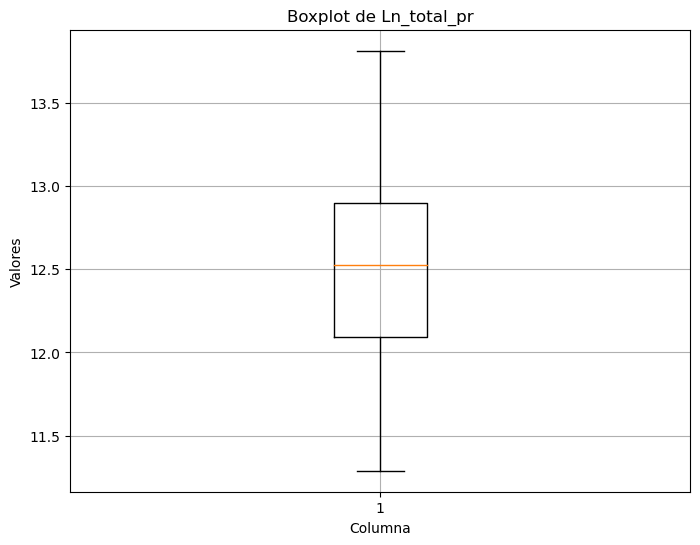

In [43]:
# Suponiendo que y_trainOLS es tu array
plt.figure(figsize=(8, 6))
plt.boxplot(y_trainOLS) ## revisar 'y_trainOLS'
plt.title('Boxplot de Ln_total_pr')
plt.xlabel('Columna')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

El gráfico no nos muestra outliers, por tanto, podemos usar `y_trainOLS` sin problema (o al menos por ahora).

## 1.5. Elaboración del modelo

In [41]:
# Añadir una constante a X_trainOLS para estimar el intercepto
X_trainOLS = sm.add_constant(X_trainOLS)

# Crear el modelo de regresión lineal
ols = sm.OLS(y_trainOLS, X_trainOLS)

# Ajustar el modelo a los datos
resOLS = ols.fit()

# Imprimir el resumen del modelo
print(resOLS.summary())

                            OLS Regression Results                            
Dep. Variable:            Ln_total_pr   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     644.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:58:17   Log-Likelihood:                 403.37
No. Observations:                2889   AIC:                            -750.7
Df Residuals:                    2861   BIC:                            -583.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Ponemos **a prueba** el modelo con los **datos de testeo**.

In [34]:
X_testOLS = sm.add_constant(X_testOLS)  # Agregar una constante para el término de intercepción
y_pred_testOLS = resOLS.predict(X_testOLS)  # Predicciones del modelo para los datos de prueba

Akram et al. (2024) utilizan cinco parámetros para medir el rendimiento del modelo: Mean Absolute Error (MAE), Relative Absolute Error (RAE), Root Mean Squared Error (RMSE), Root Relative Squared Error (RRSE) y el Coeficiente de determinación ($R^2$).

In [35]:
###Ojo que uso los datos de testeo
# Calcular el R^2
r2OLS = r2_score(y_testOLS, y_pred_testOLS)

# Calcular el MAE
maeOLS = mean_absolute_error(y_testOLS, y_pred_testOLS)

# Calcular el RMSE
rmseOLS = np.sqrt(mean_squared_error(y_testOLS, y_pred_testOLS))

# Calcular el RAE
raeOLS = maeOLS / abs(y_testOLS).mean()

# Calcular el RRSE
rrseOLS = rmseOLS / y_testOLS.std()

# Imprimir resultados
print("Coefficient of Determination (R2):", r2OLS)
print("Mean Absolute Error (MAE):", maeOLS)
print("Relative Absolute Error (RAE):", raeOLS)
print("Root Relative Squared Error (RRSE):", rrseOLS)
print("Root Mean Squared Error (RMSE):", rmseOLS)

Coefficient of Determination (R2): 0.8581742629515631
Mean Absolute Error (MAE): 0.1528489943559661
Relative Absolute Error (RAE): 0.012242945791958428
Root Relative Squared Error (RRSE): 0.37640199539822805
Root Mean Squared Error (RMSE): 0.2040998114433192


A esto pueden añadirle la **comprobación de los supuestos**. Ya saben cómo hacerlos, así que no necesitarán mi ayuda. (Por el momento, asumamos que el modelo es correcto y pasemos a ver las *redes neuronales* y los *random forest*)

Recuerden, también, que pueden guardar los resultados de su modelo. Vean el cuaderno `2-OLS`.

# 2. Red neuronal

## 2.1. Obtención y limpieza de datos

Cargamos las librerías necesarias.

In [14]:
from sklearn import preprocessing #para escalar/normalizar variables numéricas
import tensorflow as tf #Esta y las de abajo las necesitamos siempre para ANN y RF
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

## 2.2. Estandarización de los datos

Ya habíamos dividido previamente los datos de entrenamiento y testeo. Vamos a estandarizarlos por separado.

**Entrenamiento:**
- `X_trainOLS` --> `Xtrain_scale`
- `y_trainOLS` --> `ytrain_scale`

**Testeo:**
- `X_testOLS` --> `Xtest_scale`
- `y_trainOLS` --> `ytest_scale`

Como en el apartado anterior a `X_trainOLS` se le añadió una constante para elaborar el modelos OLS, vuelvo a definirla para evitar problemas. Sólo estoy copiando y pegando el código de hace un rato. 

In [15]:
# Dividir los datos en conjuntos de entrenamiento y testeo
X_trainOLS, X_testOLS, y_trainOLS, y_testOLS = train_test_split(
                                                    X_ols, y_ols, 
                                                    test_size=0.25, 
                                                    random_state=42 #Puede ser cualquier número
                                                    ) 

De las variables de mi base de datos, debo hacer un **one-hot encoding** para las categóricas y una **estandarización para las numéricas**. 

Empiezo buscando aquellas que pueden ser categóricas: contaré los valores únicos en cada columna y consideraré a aquellas con un número relativamente bajo de valores únicos como categóricas.

### 2.2.1. Estandarización de datos de entrenamiento

In [16]:
# Contar los valores únicos en cada columna
unique_counts = X_trainOLS.nunique()

# Filtrar las columnas con un número bajo de valores únicos (puedes ajustar este umbral según tu criterio)
categoricas = unique_counts[unique_counts < 5].index

categoricas

Index(['EPC_A_emision', 'EPC_B_emision', 'EPC_C_emision', 'EPC_D_emision',
       'EPC_E_emision', 'EPC_F_emision', 'EPC_G_emision', 'Year_1982_2006',
       'Year_After_2007', 'bool_aire_acondicionado', 'bool_ascensor',
       'bool_calefaccion', 'bool_piscina_comunitaria', 'dum_mar_200m',
       'grand_terr_20m2'],
      dtype='object')

He ido haciendo una revisión en Excel para diferenciar aquellas que ya están convertidas a un one-hot encoding (dummies) de aquellas que aún necesitan pasar por ese proceso. **Ninguna necesita pasar el proceso de one-hote encoding**.

In [17]:
OHE=X_trainOLS[['EPC_A_emision', 'EPC_B_emision', 'EPC_C_emision', 'EPC_D_emision',
       'EPC_E_emision', 'EPC_F_emision', 'EPC_G_emision', 
       'Year_1982_2006', 'Year_After_2007', 'bool_aire_acondicionado',
       'bool_ascensor', 'bool_calefaccion', 'bool_piscina_comunitaria',
       'dum_mar_200m', 'grand_terr_20m2']]

Selecciono las X numéricas.

In [18]:
# Crear una lista con todas las columnas dummies
columnas_a_eliminar = list(OHE.columns)

# Eliminar las columnas dummies de X_ols para quedarme sólo con las numéricas
X2 = X_trainOLS.drop(columns=columnas_a_eliminar)

Ahora hago la **estandarización** sobre las X que son numéricas.

In [19]:
#Estandarizamos los valores de X3
min_max_scaler = preprocessing.MinMaxScaler() #preprocessing es una función de la librearía 
                                              #sklearn, ya sabe lo que hacer
X3 = min_max_scaler.fit_transform(X2)

Si quiero ver información sobre X3 me encontraré lo siguiente...

In [20]:
#X3.info()

In [21]:
type(X3)

numpy.ndarray

X3 ya no es un dataframe, sino un array. Python los entiende de manera distinta. Es como si uno fuera un archivo XLSX y el otro un archivo CSV; es decir, contienen la misma información pero un formato distinto. Sin embargo, *keras* y *tensorflow* suelen preferir los arrays (son menos pesados); por tanto, vamos a convertir **OHE** para luego unir todos en un mismo objeto. 

Recuerden que tanto **OHE** como **X3** son las variables independientes de nuestro modelo: la primera tiene variables dummies o binarias (valores 0 y 1), mientras que X4 son las variables numéricas que ya hemos estandarizado.

In [22]:
# Convertir OHE a un array NumPy
OHE_array=OHE.values

# Concatenar X3, y OHE_array a lo largo del eje de las columnas (axis=1)
Xtrain_scale = np.concatenate((X3,OHE_array), axis=1)

Cuando elabore el modelo de redes neuronales, voy a necesitar saber cuántas variables independientes tengo (X), asi que para eso cuento la cantidad de columnas que tienen mi array *X_scale*.

In [23]:
Xtrain_scale.shape[1]

31

Por si acaso, también convierto las Y en array.

In [24]:
ytrain_scale = y_trainOLS.values

### 2.2.2. Estandarización de datos de testeo

In [25]:
OHE2=X_testOLS[['EPC_A_emision', 'EPC_B_emision', 'EPC_C_emision', 'EPC_D_emision',
       'EPC_E_emision', 'EPC_F_emision', 'EPC_G_emision', 
       'Year_1982_2006', 'Year_After_2007', 'bool_aire_acondicionado',
       'bool_ascensor', 'bool_calefaccion', 'bool_piscina_comunitaria',
       'dum_mar_200m', 'grand_terr_20m2']]

# Crear una lista con todas las columnas dummies
columnas_a_eliminar = list(OHE2.columns)

# Eliminar las columnas dummies de X_ols para quedarme sólo con las numéricas
X2_2 = X_testOLS.drop(columns=columnas_a_eliminar)

#Estandarizamos los valores de X3
X3_2 = min_max_scaler.fit_transform(X2_2)

# Convertir OHE a un array NumPy
OHE2_array=OHE2.values

# Concatenar X3, y OHE_array a lo largo del eje de las columnas (axis=1)
Xtest_scale = np.concatenate((X3_2,OHE2_array), axis=1)

# Convierto la Y en array también
ytest_scale = y_testOLS.values


## 2.3. Elaboración del modelo

In [26]:
model = Sequential([
    Dense(128, activation='relu', #Valor usado en la literatura
    input_shape=(31,)), #Noten que acá van la cantidad de X
    Dense(64, activation='relu'), #Valor usado en la literatura
    Dense(1)  #Queremos una sola salida
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.005), #Valor usado en la literatura
    loss='mean_squared_error', #Error Cuadrático Medio. Le "dice" al modelo que es mejor tener una gran
                               #cantidad de errores pequeños a una poca cantidad de errores grandes.
    metrics=['accuracy'] #Valor usado en la literatura
)

nnmodel = model.fit(Xtrain_scale, ytrain_scale, epochs=1000, #Valor usado en la literatura
               callbacks=[EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)], #Valores usados en la literatura
               batch_size=6, #Valor usado en la literatura
               verbose=False, #Sólo para que no imprima muchas cosas mientras procesa el modelo
               validation_split=0.3 #Valor usado en la literatura
              )

In [27]:
# Predicciones en el conjunto de testeo
y_predANN = model.predict(Xtest_scale)

# Coefficient of determination (R2)
r2ANN = r2_score(ytest_scale, y_predANN)

# Mean Absolute Error (MAE)
maeANN = mean_absolute_error(ytest_scale, y_predANN)

# Relative Absolute Error (RAE)
raeANN = np.sum(np.abs(y_predANN - ytest_scale)) / np.sum(np.abs(np.mean(ytest_scale) - ytest_scale))

# Root Relative Squared Error (RRSE)
rrseANN = np.sqrt(np.sum((y_predANN - ytest_scale) ** 2) / np.sum((np.mean(ytest_scale) - ytest_scale) ** 2))

# Root Mean Squared Error (RMSE)
rmseANN = np.sqrt(mean_squared_error(ytest_scale, y_predANN))

# Imprimir resultados
print("Coefficient of Determination (R2):", r2ANN)
print("Mean Absolute Error (MAE):", maeANN)
print("Relative Absolute Error (RAE):", raeANN)
print("Root Relative Squared Error (RRSE):", rrseANN)
print("Root Mean Squared Error (RMSE):", rmseANN)

31/31 [==============================] - 0s 1ms/step
Coefficient of Determination (R2): 0.8383267129824112
Mean Absolute Error (MAE): 0.1674062180086327
Relative Absolute Error (RAE): 1378.6738669217593
Root Relative Squared Error (RRSE): 45.67745883556555
Root Mean Squared Error (RMSE): 0.2179135385486499


Guardamos.

In [28]:
import pickle

# Guardar el modelo
model.save("modelos/NN3-BCN4K")

# Guardar el historial
with open("modelos/NN3-BCN4K/history.pkl", "wb") as f:
    pickle.dump(nnmodel.history, f)

INFO:tensorflow:Assets written to: modelos/NN3-BCN4K\assets


INFO:tensorflow:Assets written to: modelos/NN3-BCN4K\assets


### 2.3.1. Evaluación de los parámetros

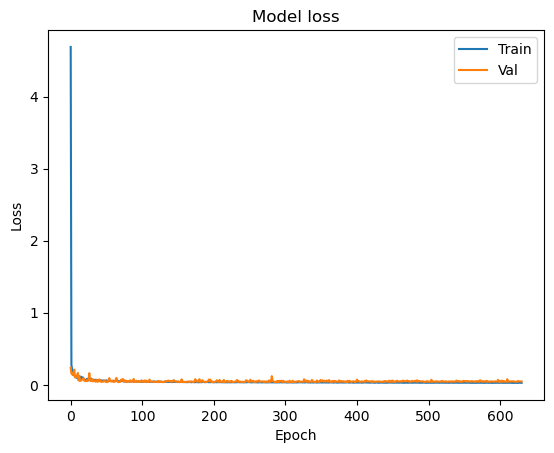

In [35]:
plt.plot(nnmodel.history['loss'])
plt.plot(nnmodel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### 2.3.2. Pesos de las variables

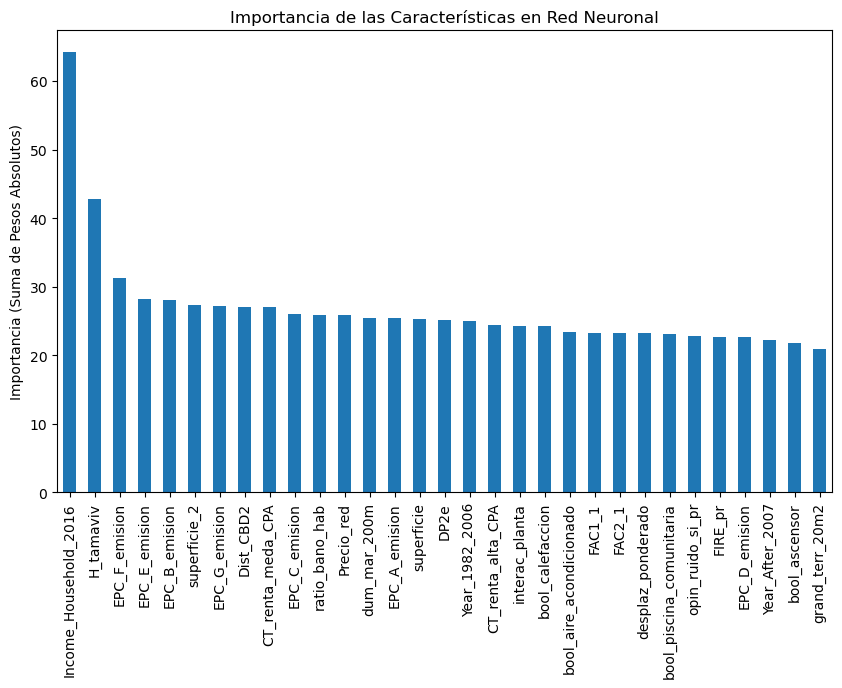

In [37]:
# Obtener los pesos de la red neuronal
weights = model.get_weights()

# Crear un DataFrame con los pesos y sus correspondientes nombres de características
weights_df = pd.DataFrame(weights[0].T, columns=X_ols.columns)  # X_ols se usa sólo para capturar los
                                                                # nombres de las columnas

# Calcular la importancia de las características sumando los valores absolutos de los pesos
feature_importance = weights_df.abs().sum()

# Ordenar la importancia de las características
feature_importance = feature_importance.sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la importancia
feature_importance.plot(kind='bar', figsize=(10, 6))
plt.title('Importancia de las Características en Red Neuronal')
plt.ylabel('Importancia (Suma de Pesos Absolutos)')
plt.show()


En una red neuronal, los pesos de las variables se calculan durante el proceso de entrenamiento mediante algoritmos de optimización como el descenso del gradiente estocástico (SGD), Adam, RMSProp, entre otros. Estos algoritmos ajustan los pesos de la red para minimizar una función de pérdida que mide la diferencia entre las salidas predichas por la red y las salidas reales (etiquetas) en el conjunto de datos de entrenamiento.

El proceso de cálculo de los pesos de las variables en una red neuronal implica los siguientes pasos:
- Inicialización de pesos: Los pesos de la red neuronal se inicializan aleatoriamente (a menudo de manera cercana a cero) al comienzo del entrenamiento.
- Propagación hacia adelante (Forward Propagation): Durante esta etapa, las entradas se propagan a través de la red neuronal capa por capa, aplicando los pesos y las funciones de activación en cada capa para generar una salida.
- Cálculo de la función de pérdida: Se calcula la diferencia entre las salidas predichas y las salidas reales utilizando una función de pérdida. Esta función de pérdida puede ser, por ejemplo, el error cuadrático medio (MSE) para problemas de regresión o la entropía cruzada para problemas de clasificación.
- Retropropagación del error (Backpropagation): Este es el paso crítico en el que se calculan las derivadas parciales de la función de pérdida con respecto a los pesos de la red, utilizando el algoritmo de la retropropagación del error. Estas derivadas indican cómo deberían cambiar los pesos para reducir la pérdida.
- Actualización de los pesos: Los algoritmos de optimización utilizan las derivadas calculadas en el paso anterior para ajustar los pesos de la red, moviéndolos en la dirección que reduce la pérdida. Esto se hace multiplicando las derivadas por una tasa de aprendizaje y actualizando los pesos de acuerdo con el algoritmo de optimización elegido.
- Repetición: Los pasos 2 a 5 se repiten iterativamente durante múltiples épocas o hasta que se alcance un criterio de detención (por ejemplo, convergencia de la pérdida).

# 3. Random Forest

## 3.1. Preparación de datos

Sólo para estar seguros, repito el paso realizado con el segundo modelo OLS respecto de la identificación de X y Y de entrenamiento y testeo.

Hay que tener en cuenta que en Random Forest **no es necesario estandarizar las variables explicativas**. De hecho, probé el modelo que viene a continuación con variables estandarizadas y sin estandarizar, y el segundo intento resultó mejor.

In [30]:
# Definir las variables independientes (X) y dependiente (y)
X_RF = bdd.drop('Ln_total_pr', axis=1)  # Todas las columnas excepto 'Ln_total_pr'
y_RF = bdd['Ln_total_pr']  # Columna 'Ln_total_pr' 
  

# Dividir los datos en conjuntos de entrenamiento y testeo
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(
                                                    X_RF, y_RF, 
                                                    test_size=0.25, 
                                                    random_state=42 #Puede ser cualquier número
                                                    ) 

## 3.2. Elaboración del modelo

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=200, #Literatura indica que esto es prueba y error 
                                 random_state=42) #Puede ser cualquier número

# Entrenar el modelo
rf_model.fit(X_trainRF, y_trainRF)

# Predecir sobre los datos de prueba
y_predRF = rf_model.predict(X_testRF)

In [32]:
#Calcular coeficiente de determinación
r2RF = r2_score(y_testRF, y_predRF)

# Calcular MAE
maeRF = mean_absolute_error(y_testRF, y_predRF)

# Calcular RAE
raeRF = maeRF / np.mean(np.abs(y_testRF))

# Calcular RMSE
rmseRF = np.sqrt(mean_squared_error(y_testRF, y_predRF))

# Calcular RRSE
rrseRF = rmseRF / np.std(y_testRF)

# Imprimir resultados
print("Coefficient of Determination (R2):", r2RF)
print("Mean Absolute Error (MAE):", maeRF)
print("Relative Absolute Error (RAE):", raeRF)
print("Root Relative Squared Error (RRSE):", rrseRF)
print("Root Mean Squared Error (RMSE):", rmseRF)

Coefficient of Determination (R2): 0.8835498856582451
Mean Absolute Error (MAE): 0.13645861378547722
Relative Absolute Error (RAE): 0.010930104044588228
Root Relative Squared Error (RRSE): 0.34124787814982077
Root Mean Squared Error (RMSE): 0.184941782255252


In [33]:
import joblib

# Guardar el modelo de Random Forest
joblib.dump(rf_model, 'modelos/RF2-BCN4K.pkl')

['modelos/RF2-BCN4K.pkl']

## 3.3. Evaluación de los parámetros

### 3.3.1. N° árboles

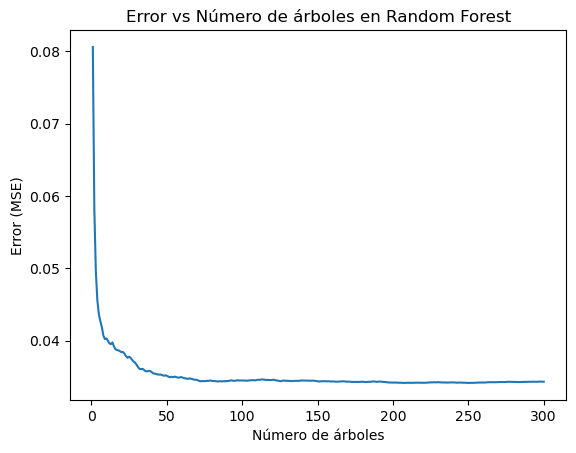

In [43]:
## CUIDADO AL EJECUTAR ESTE SCRIPT: TIEMPO DE PROCESAMIENTO ALTO ##
# Calcular el error (MSE) en función del número de árboles en el bosque
trees = range(1, 301)  # Rango de 1 a 200 árboles
errors = []
for n_trees in trees:
    rf_model = RandomForestRegressor(n_estimators=n_trees, random_state=42)
    rf_model.fit(X_trainRF, y_trainRF)
    y_predRF = rf_model.predict(X_testRF)
    errors.append(mean_squared_error(y_testRF, y_predRF))

# Graficar el error en función del número de árboles
plt.plot(trees, errors)
plt.xlabel('Número de árboles')
plt.ylabel('Error (MSE)')
plt.title('Error vs Número de árboles en Random Forest')
plt.show()

### 3.3.2. N° de observaciones (filas)

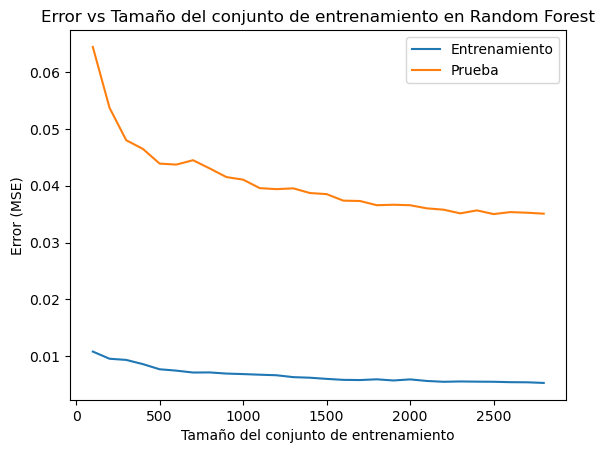

In [40]:
# Calcular el error (MSE) en función del tamaño del conjunto de entrenamiento
train_sizes = range(100, len(X_trainRF), 100)  # Incremento de 100 observaciones
train_errors = []
test_errors = []
for size in train_sizes:
    rf_model.fit(X_trainRF[:size], y_trainRF[:size])
    y_train_pred = rf_model.predict(X_trainRF[:size])
    y_test_pred = rf_model.predict(X_testRF)
    train_errors.append(mean_squared_error(y_trainRF[:size], y_train_pred))
    test_errors.append(mean_squared_error(y_testRF, y_test_pred))

# Graficar el error en función del tamaño del conjunto de entrenamiento
plt.plot(train_sizes, train_errors, label='Entrenamiento')
plt.plot(train_sizes, test_errors, label='Prueba')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Error (MSE)')
plt.title('Error vs Tamaño del conjunto de entrenamiento en Random Forest')
plt.legend()
plt.show()

### 3.3.3. N° de variables (columnas)

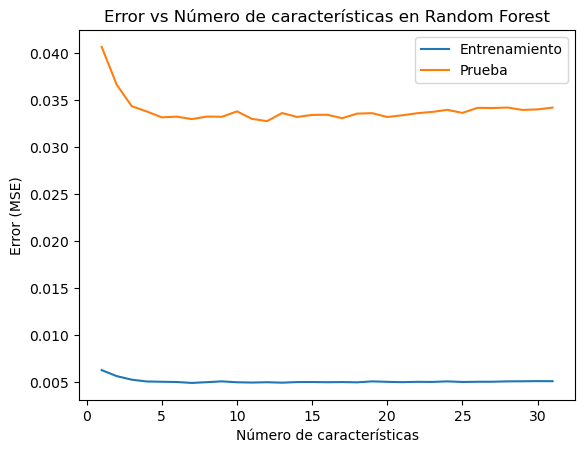

In [45]:
# Definir el rango de número de características a considerar
feature_range = range(1, X_trainRF.shape[1] + 1)

# Inicializar listas para almacenar los errores
train_errors = []
test_errors = []

# Iterar sobre el rango de número de características
for n_features in feature_range:
    rf_model = RandomForestRegressor(n_estimators=200, max_features=n_features, random_state=42)
    rf_model.fit(X_trainRF, y_trainRF)
    y_train_pred = rf_model.predict(X_trainRF)
    y_test_pred = rf_model.predict(X_testRF)
    train_errors.append(mean_squared_error(y_trainRF, y_train_pred))
    test_errors.append(mean_squared_error(y_testRF, y_test_pred))

# Graficar el error en función del número de características
plt.plot(feature_range, train_errors, label='Entrenamiento')
plt.plot(feature_range, test_errors, label='Prueba')
plt.xlabel('Número de características')
plt.ylabel('Error (MSE)')
plt.title('Error vs Número de características en Random Forest')
plt.legend()
plt.show()

## 3.4. Peso de las variables

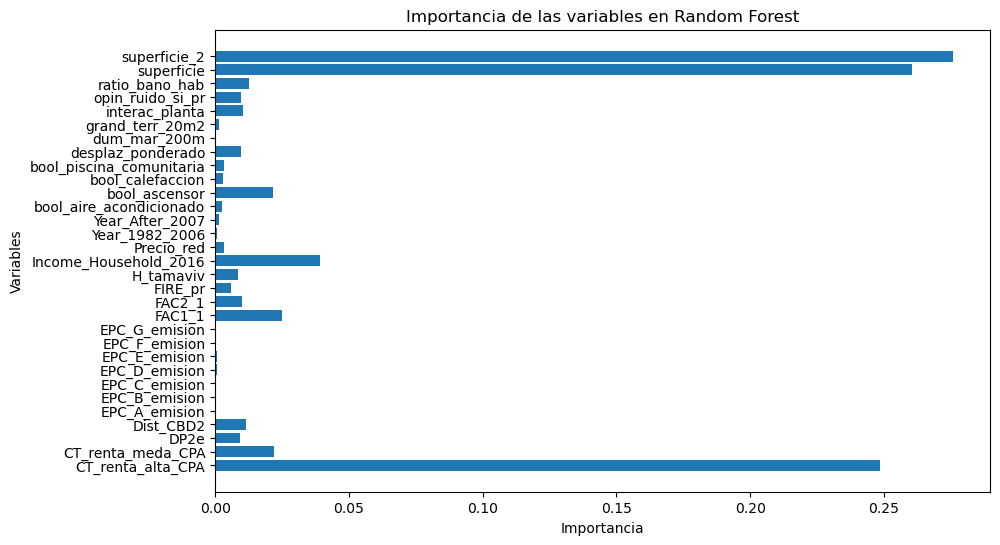

In [44]:
# Calcular la importancia de las variables
feature_importance = rf_model.feature_importances_

# Obtener nombres de las variables
feature_names = X_trainRF.columns

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en Random Forest')
plt.show()

La importancia de las variables se calcula basándose en cuánto reducen la impureza o el error (por ejemplo, la reducción de la varianza) en cada nodo del árbol. Para estimar la importancia de una característica, se mide cuánto empeora la medida de impureza (como el índice de Gini o la ganancia de información) cuando las muestras de ese nodo se dividen solo en esa característica. Luego, esta disminución de la impureza se promedia sobre todos los árboles en el bosque para obtener una estimación general de la importancia de la característica.

El hecho de que ninguna tenga valores negativos se debe a cómo se calcula la importancia de las características: **no es una medida relativa (por ejemplo, coeficientes en un modelo de regresión lineal) que pueda ser positiva o negativa. En cambio, se calcula como una medida de la contribución de la característica a la precisión del modelo**. Las características con mayor importancia contribuyen más a la precisión del modelo, mientras que las características con menor importancia tienen una contribución menor.

Como resultado, la importancia de las características siempre es no negativa y no tiene sentido que sea negativa, ya que eso implicaría que la característica reduce la precisión del modelo, lo cual no tiene sentido en el contexto de Random Forest.

Es útil utilizar la importancia de las características como una guía para comprender cuáles son más relevantes para el modelo, pero no necesariamente como una medida absoluta de la importancia o relevancia de una característica en sí misma.

## 4. Comparación de modelos

In [34]:
# Crear un diccionario con los datos
data = {
    'Modelo': ['OLS', 'ANN', 'RF'],
    'R2': [r2OLS, r2ANN, r2RF],
    'MAE': [maeOLS, maeANN, maeRF],
    'RAE': [raeOLS, raeANN, raeRF],
    'RRSE': [rrseOLS, rrseANN, rrseRF],
    'RMSE': [rmseOLS, rmseANN, rmseRF ]
}

# Crear un DataFrame con los datos
comparacion = pd.DataFrame(data)

# Mostrar la tabla
print(comparacion)

  Modelo        R2       MAE          RAE       RRSE      RMSE
0    OLS  0.880814  0.140476     0.011252   0.345053  0.187101
1    ANN  0.838327  0.167406  1378.673867  45.677459  0.217914
2     RF  0.883550  0.136459     0.010930   0.341248  0.184942
